In [1]:
#Import the libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
PATH = 'F:/Crop Recommendation Engine/Rising Crops/data/crop_recommendation1.csv'
df = pd.read_csv(PATH)

In [3]:
category_col = ['season']
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col])
    
    le_name_mapping = dict(zip(labelEncoder.classes_,labelEncoder.transform(labelEncoder.classes_))) 
    
    mapping_dict[col]= le_name_mapping 
    
print(mapping_dict)

{'season': {'kharif': 0, 'rabi': 1, 'zaid': 2}}


In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,season,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,season,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,0,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,0,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,0,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,0,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,0,coffee


In [6]:
df.size

19800

In [7]:
df.shape

(2200, 9)

In [8]:
#Dataset Columns
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'season',
       'label'],
      dtype='object')

In [9]:
#Types of Crops 
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
season           int32
label           object
dtype: object

In [11]:
#No.of each crop rows 
df['label'].value_counts()

lentil         100
banana         100
orange         100
chickpea       100
jute           100
apple          100
blackgram      100
coconut        100
mango          100
pigeonpeas     100
rice           100
grapes         100
papaya         100
maize          100
watermelon     100
pomegranate    100
kidneybeans    100
cotton         100
mungbean       100
mothbeans      100
coffee         100
muskmelon      100
Name: label, dtype: int64

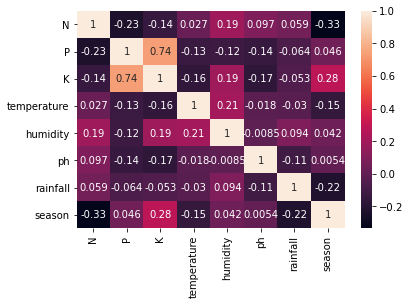

In [12]:
#Correlation Heatmap
sns.heatmap(df.corr(),annot=True)

In [13]:
#Separating Features and Target label
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'season', 'rainfall']]
target = df['label']
labels = df['label']

In [14]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [15]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,season,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,rice


In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [18]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,season,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,rice


In [19]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

#Saving the Decision Tree Model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

DecisionTrees's Accuracy is:  90.22727272727272
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.90      0.83      0.86        23
       maize       1.00      1.00      1.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.65      0.89      0.76        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [20]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [21]:
#SVM
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  13.863636363636363
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.29      0.45        17
   blackgram       1.00      0.31      0.48        16
    chickpea       1.00      0.10      0.17        21
     coconut       1.00      0.05      0.09        21
      coffee       1.00      0.05      0.09        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.14      0.25        28
 kidneybeans       0.04      1.00      0.07        14
      lentil       1.00      0.04      0.08        23
       maize       0.00      0.00      0.00        21
       mango       1.00      0.04      0.07        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.39      0.56        23
      orange       1.00      0.03      0.0

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  96.13636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.87      0.81      0.84        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.89      0.84      0.86        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00    

In [30]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

#Saving the Random Forest Model
import pickle
# Dump the trained Random Forest classifier with Pickle
DT_pkl_filename = 'RandomForest1.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

RF's Accuracy is:  99.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

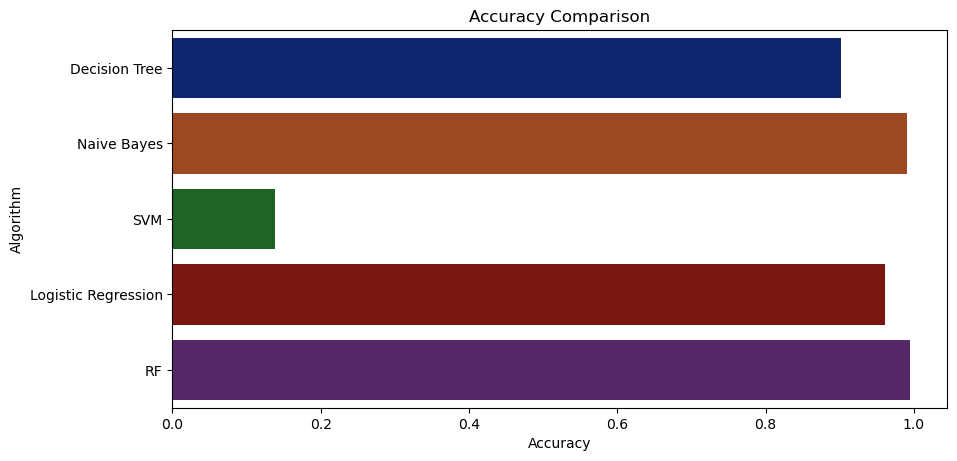

In [24]:
#Accuracy Comparision
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [25]:
#Printing all the models
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

Decision Tree --> 90.22727272727272
Naive Bayes --> 99.0909090909091
SVM --> 13.863636363636363
Logistic Regression --> 96.13636363636363
RF --> 99.54545454545455


In [29]:
#Making the prediction
#Input Columns --> 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'season', 'rainfall'
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7,2, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [28]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0,1, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [ ]:
#Done by 
#I.Abu Talha - 170071601004
#Adithya raj.R - 170071601005
#Project Guide - Dr.E.Syed Mohamed(Professor and Head)